TODOS:<br>

- Übersicht über alle Verfahren geben in kapitel 3 (Tabelle?!)
- überprüfen Formulierung
- untertitel der grafik bei LSA in pdf überprüfen


für generierung:
- toc entfernen?
-  tabelle anpassen in 3.1
- alle %%time entfernen!
- imports entfernen
- alle code zeilen gut angezeigt?
- Fußnoten fixen

<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Einführung" data-toc-modified-id="Einführung-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Einführung</a></span><ul class="toc-item"><li><span><a href="#Das-Bag-of-Words-Modell" data-toc-modified-id="Das-Bag-of-Words-Modell-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Das Bag-of-Words Modell</a></span></li><li><span><a href="#Grenzen-des-Bag-of-Words-Modells" data-toc-modified-id="Grenzen-des-Bag-of-Words-Modells-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grenzen des Bag-of-Words Modells</a></span></li></ul></li><li><span><a href="#LSA" data-toc-modified-id="LSA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LSA</a></span></li><li><span><a href="#Word-Embeddings" data-toc-modified-id="Word-Embeddings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Word Embeddings</a></span><ul class="toc-item"><li><span><a href="#Allgemeines" data-toc-modified-id="Allgemeines-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Allgemeines</a></span></li><li><span><a href="#Word2Vec" data-toc-modified-id="Word2Vec-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Word2Vec</a></span><ul class="toc-item"><li><span><a href="#Vortrainierte-Embeddings-verwenden" data-toc-modified-id="Vortrainierte-Embeddings-verwenden-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Vortrainierte Embeddings verwenden</a></span></li><li><span><a href="#Eigene-Embeddings-trainieren" data-toc-modified-id="Eigene-Embeddings-trainieren-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Eigene Embeddings trainieren</a></span></li></ul></li><li><span><a href="#GloVe" data-toc-modified-id="GloVe-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>GloVe</a></span></li><li><span><a href="#FastText" data-toc-modified-id="FastText-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>FastText</a></span></li><li><span><a href="#ELMo" data-toc-modified-id="ELMo-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>ELMo</a></span></li><li><span><a href="#BERT" data-toc-modified-id="BERT-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>BERT</a></span></li></ul></li></ul></div>

In [32]:
from flair.data import Sentence
from flair.embeddings import WordEmbeddings

import gensim
from gensim.models import Word2Vec
import gensim.downloader as gensim_downloader

import matplotlib.pyplot as plt
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
from nltk import word_tokenize
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import urllib.request

from utils import preprocess_text, plot_word_embeddings

In [ ]:
# TODO: weg
"""
text_w2v = ["das kind sagt, dass es feuerwehrmann sein möchte",
            "der erwachsene sagt, dass er lieber kein feuerwehrmann sein möchte",
            "das kind fragt, was der erwachsene denn lieber sein möchte",
            "der erwachsene sagt, dass er lieber polizist sein möchte"]
#text_w2v = [word_tokenize(sen) for sen in text_w2v]
df = pd.DataFrame(text_w2v, columns = ["text"])

url = 'http://cloud.devmount.de/d2bc5672c523b086/german.model'
urllib.request.urlretrieve(url, "german_model.bin")
"""

In [7]:
%%time
corpus = pd.read_csv("../corpora/small_amazon_reviews_electronic.csv")
corpus["review"] = corpus.review.apply(lambda x: preprocess_text(x))
texts = [word_tokenize(row["review"]) for idx, row in corpus.iterrows()]

CPU times: user 1min 1s, sys: 1.14 s, total: 1min 2s
Wall time: 1min 2s


# Einführung

Das **Natural Language Processing** (kurz: NLP) befasst sich mit Methoden und Verfahren zur maschinellen Verarbeitung von natürlicher Sprache in Form von Worten, Texten oder ganzen Korpora. Bevor jedoch NLP Verfahren wie die Textklassifikation oder das Topic Modelling auf die Textdaten angewendet werden können, müssen diese in eine Darstellungsweise umgewandelt werden, mit der die Verfahren arbeiten können. Die rohen Textdaten werden daher in **Vektoren**, die aus Zahlen bestehen, umgewandelt. Dieser Vorgang nennt sich **Vektorisierung**. Ein Wort wie "Baum" kann dadurch als Vektor aufgefasst werden. Natürlich können auch andere Features aus den Texten als Vektoren dargestellt werden; so ist es auch möglich, einzelne Buchstaben, Phrasen, Sätze, Segmente oder ganze Texte als Features aus den Textdaten zu extrahieren und diese zu vektorisieren. In der folgenden Übersicht werden jedoch vorwiegend Wörter als Features verwendet.

## Das Bag-of-Words Modell

Das wohl einfachste Verfahren zur Darstellung von Wörtern als Vektoren ist das **Bag-of-Words** Modell. Wörter werden hier als eindimensionale Vektoren (= einfache Zahlen) dargestellt, wobei jedes individuelle Wort einen individuellen eindimensionalen Vektor (auch: **Index**) zugeordnet bekommt. Die Zuordnungen jedes einzigartigen Wortes zu seinem Vektor werden in einem *Vokabular* gespeichert. Nun können mithilfe dieses Vokabulars auch ganze Sätze oder sogar Texte dargestellt werden. Dafür wird für jeden Satz/Text ein Vektor gebildet, der die gleiche Länge wie das Vokabular hat. Jedem Eintrag des Vektors wird anhand des Vokabulars ein Wort zugeordnet. Der Satz/Text wird dann als Vektor aus **absoluten Termhäufigkeiten** dargestellt, wo an jeder Stelle, an dem ein Wort aus dem Vokabular in dem Text vorkommt, die Häufigkeit des Wortes in dem jeweiligen Satz/Text steht und an jeder anderen Stelle eine $0$, da es kein einziges Mal vorkommt.[<sup>1</sup>](#fn1) Dies soll im Folgenden anhand eines Code-Beispiels erläutert werden. Zuerst wird das Vokabular aller Texte dargestellt, bei dem die Wörter einem Index zugeordnet werden (es wird ab $0$ gezählt). Danach werden die vektorisierten Sätze/Texte angezeigt.

<hr style="border: 0.1px solid black;"/>
<div id="fn1" style="font-size:8pt; line-height:1; padding-left: 1em; text-indent: -1em"><sup style="font-size:5pt">1</sup> &nbsp;Dies ist nur eine Möglichkeit, die Häufigkeit eines Wortes beim Bag-of-Words Modell darzustellen. Eine weitere Möglichkeit wären <b>binäre Häufigkeiten</b>, bei denen das Vorkommen eines Wortes mit einer $1$ und die Abwesenheit eines Wortes mit einer $0$ gekennzeichnet werden. Um häufigen Wörtern in den Dokumenten weniger Gewicht zu geben, da diese meist einen geringeren Informationsgehalt besitzen, ist es auch möglich, das Bag-of-Words Modell in der Kombination mit dem <b>TF-IDF Maß</b> aus dem Bereich des Information Retrievals zu verwenden, bei dem die Häufigkeit von Worten skaliert wird.</div> 

In [ ]:
text = ["ich gehe nachher zur bank, um etwas geld zu holen",
        "ich möchte mich kurz auf die bank setzen",
        "um mir etwas zu essen zu holen, stand ich von der bank auf", 
        "auf der hölzernen bank neben der bank liegt noch geld"]

vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(text)
print(vectorizer.vocabulary_)

In [ ]:
print(vector.toarray())

## Grenzen des Bag-of-Words Modells

Aufgrund seiner Einfachheit ist das Bag-of-Words Modell leicht verständlich und sehr schnell umsetzbar. Es hat jedoch eine Reihe an Nachteilen, von deinen einige im Folgenden kurz erläutert werden:

- **Keine Informationen über Reihenfolge der Wörter.** Beim Bag-of-Words Modell wird jegliche Information über die Reihenfolge der Wörter verworfen, der Kontext eines Wortes bleibt unberücksichtigt. Dies wird auch durch den Namen dieses Modells deutlich: Die Bezeichnung "bag" (deutsch: Sack) soll darauf hinweisen, dass alle Informationen über die Struktur oder Reihenfolge der Wörter im Dokument verworfen werden, da sie metaphorisch in einen "Sack" geworfen werden. Die Reihenfolge lässt sich auch nicht im Nachhinein rekonstruieren. Insgesamt gehen somit sehr viele semantische Informationen verloren. Eine Lösung, bei der die Reihenfolge der Worte berücksichtigt werden kann, ist die Verwendung von **N-Grammen** oder **LSA** (Kapitel 2 TODO). 
- **Spärlichkeit von Wortvektoren.** Umso mehr verschiedene Worte in den verwendeten Texten vorkommen, umso größer wird das Vokabular. Dies kann oft zu sehr spärlichen (engl. *sparse*) Wortvektoren führen. Besteht das Vokabular aus 500000 Worten, ein Text aber nur aus 50 verschiedenen Worten, sind nur 0.01% der Stellen des 500000 langen Wortvektors mit Einsen besetzt, der Rest nur mit Nullen. Dies führt dazu, dass eine große Menge an Rechenspeicher für die Verarbeitung der riesigen Matrizen benötigt wird. Weiterhin werden wenige Informationen in sehr großen Repräsentationsräumen benutzt, wodurch es für einige NLP Verfahren und Modelle problematisch ist, diese wenigen Informationen effizient zu nutzen. Eine Lösung bieten dichtbesetzte **Word Embeddings**, die in den nächsten Kapiteln behandelt werden.
- **Abbildung der Mehrdeutigkeit von Worten**. Wörter können trotz gleicher Schreibweise mehrere Bedeutungen haben, welche sich durch den Kontext des Wortes zeigen können. Dies wird durch das Bag-of-Words Modell nicht abgebildet. Eine mögliche Lösung wäre die Verwendung von **kontextabhängigen Word Embeddings** wie die **BERT-Embeddings** in Kapitel 3.6 (TODO).

# LSA

**Latent Semantic Analysis** (kurz: LSA, auch: *Latent Semantic Indexing*) ist ein Verfahren aus dem Bereich des Information Retrievals aus dem Jahre 1990. Bei diesem Verfahren werden Dokumente und Terme (repräsentiert durch eine **Term-Dokument Matrix**) in einem latenten Raum abgebildet, der aus **Konzepten** (oder **Hauptkomponenten**) besteht. Dokumente, die ähnlich zueinander sind, d.h. aus ähnlichen Konzepten bestehen, werden in diesem Raum näher beieinander platziert. Dies wird durch die folgende Grafik deutlich.


![lsa](img/lsa.png)

Grafik von Susan Dumais, siehe <a href="http://www.ifis.uni-luebeck.de/~moeller/tuhh-lectures/mmieir-sose-12/05-Latent-Semantic-Analysis.pdf">Präsentation</a>.

Das Ziel der LSA ist es, die Konzepte innerhalb der Dokumente zu finden. Dabei greift das Verfahren auf eine Technik der linearen Algebra zurück, der **Singulärwertzerlegung** (englisch: Singular Value Decomposition). Die Idee dabei ist, dass die Term-Dokument Matrix aus **Hauptdimensionen**, welche die wichtigen Konzepte der Dokumente beinhalten, und aus weniger aussagekräftigen Dimensionen mit unwichtigen Termen besteht. Mithilfe der Singulärwertzerlegung wird die originale Term-Dokument Matrix in drei Matrizen aufgeteilt, wobei die beiden äußeren Matrizen aus den linken bzw. rechten orthonormalen Eigenvektoren bestehen und die mittlere Matrix eine Diagonalmatrix ist, die die singulären Werte der Originalmatrix enthält. Mit Hilfe dieser Zerlegung kann eine **Approximation** der Originalmatrix mit einer kleiner dimensionierten Matrix erreicht werden. Die singulären Werte in der Diagonalmatrix sind nach ihrer Größe absteigend geordnet. Singulärwerte, die unter einem bestimmten Schwellenwert liegen, werden entfernt. Auch in den anderen Matrizen werden entsprechende Zeilen oder Spalten entfernt. Mit Hilfe der reduzierten Matrizen erhält man durch Matrixmultiplikation die optimale Approximation der Originalmatrix, die kleiner als die originale Term-Dokument Matrix ist, da Informationen aus den weniger aussagekräftigen Dimensionen verworfen wurden. Weiterhin werden bei der Dimensionsreduktion auch ähnliche Konzepte zusammengefasst, so werden z.B. Worte wie "Tür" und "Tor" in einem Konzept zusammengefasst.

Der Vorteil der LSA ist, dass anders als beim Bag-of-Words Modell die **Semantik** der Dokumente wiedergegeben werden kann. Zudem werden **Synonyme** zusammengefasst. Probleme hat LSA jedoch mit der **Polysemie**. Zudem ist der Algorithmus sehr rechenaufwendig.

TODO: mehr?

# Word Embeddings

## Allgemeines

**Word Embeddings** (deutsch: Worteinbettungen) sind die Sammelbezeichnung für eine Reihe von Sprachmodellierungstechniken. Anders als beim Bag-of-Words Modell werden Wörter mit ähnlichen Bedeutungen ähnlich dargestellt, wobei der Kontext der Wörter berücksichtigt wird. Word Embeddings repräsentieren Wörter als Vektoren in einem multidimensionalen semantischen Raum. In diesem Raum werden Wörter, die ähnlich zueinander sind, näher beieinander platziert. Diesen Raum kann man sich etwa folgendermaßen vorstellen:<br>


![wordembeddings](img/we_space.jpg)

Die grundsätzliche Idee von Word Embeddings basiert auf der **Distributionellen Hypothese** von  John Rupert Firth, die besagt, dass die Bedeutung eines Wortes durch sein Umfeld geprägt ist. Wörter, die einen ähnlichen Kontext besitzen, haben eine ähnliche Bedeutung. Anders als vorherige Vektorisierungsmethoden basieren Word Embeddings auf **Vorhersagemodellen** (englisch: **prediction models**)[<sup>2</sup>](#fn2), indem Wörter durch Wahrscheinlichkeiten anstatt durch Häufigkeiten wie beim Bag-of-Words Modell oder bei der Latent Semantic Analysis dargestellt werden. Weiterhin sind die Wortvektoren von Word Embeddings anders als beim Bag-of-Words Modell **dichtbesetzt** (englisch: **dense**) und haben weitaus weniger Dimensionen (100-800 Dimensionen anstatt 100000-1000000, je nach der Größe des Vokabulars). Dadurch haben die Wortvektoren eine viel geringere Größe, bieten trotzdem eine effizientere und komplexere Darstellung der Wörter.

Eine weitere Besonderheit von Word Embeddings ist, dass es mit diesen möglich ist, eine Arithmetik mit Wörtern umzusetzen. So kann mit Wortvektoren "gerechnet" werden. Folgende Gleichungen sind mit Word Embeddings möglich:

`König - Mann + Frau = Königin`<br>

`London - Großbritannien + Deutschland = Berlin`


Word Embeddings wurden ab 2013 durch die Einführung des Algorithmus **Word2Vec** populär, in den Jahren darauf folgten weitere Word Embedding Algorithmen wie **GloVe**, **FastText**, **ELMo** und **BERT**. In der folgenden Tabelle sind die wichtigsten Unterschiede der verschiedenen Embeddings zusammengefasst, genauere Erläuterungen der Embeddings befinden sich in den folgenden Kapiteln.


<hr style="border: 0.1px solid black;"/>
<div id="fn2" style="font-size:8pt; line-height:1; padding-left: 1em; text-indent: -1em"><sup style="font-size:5pt">2</sup> &nbsp;Obwohl GloVe eigentlich kein Vorhersagemodell verwendet, unterscheidet sich GloVe trotzdem stark von vorhergehenden, Häufigkeits-basierenden Modellen, weshalb es oft als Vohersagemodell angesehen wird, siehe LEVY et. al. (2015), Improving Distributional Similarity with Lessons Learned from Word Embeddings, https://levyomer.files.wordpress.com/2015/03/improving-distributional-similarity-tacl-2015.pdf (abgerufen am 31.07.2020).</div>

TODO: ausfüllen & mehr, gucken wie anders dargestellt werden kann

<table>
    <th></th>
    <th>Word2Vec</th>
    <th>GloVe</th>
    <th>FastText</th>
    <th>ELMo</th>
    <th>BERT</th>
    <tr>
        <td>Entstehungsjahr</td>
        <td>2013</td>
        <td>2014</td>
        <td>2016</td>
        <td>2018</td>
        <td>2018</td>
    </tr> 
    <tr>
        <td>Out of vocabulary Fehler</td>
        <td>ja</td>
        <td>ja</td>
        <td>nein</td>
        <td>nein</td>
        <td>nein</td>
    </tr> 
    <tr>
        <td>Kontextsensitiv</td>
        <td>nein</td>
        <td>nein</td>
        <td>nein</td>
        <td>ja</td>
        <td>ja</td>
    </tr> 
    <tr>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr> 
</table>

## Word2Vec

Die Popularität von Word Embeddings ist vor allem **Word2Vec** geschuldet, welches 2013 von Tomas Mikolov und weiteren Mitgliedern von Google publiziert wurde. Word2Vec basiert auf einer simplen und effektiven Feedforward Neuronalen Netzstruktur. Word2Vec implementiert zwei verschiedene Ansätze zur Berechnung der Wortwahrscheinlichkeiten: **Continous Bag of Words** (**CBOW**) und das **Skip-gram Modell**. 

**Continous Bag of Words** versucht die Wahrscheinlichkeit eines Wortes oder einer Gruppe von Wörtern anhand eines gegebenen Kontext vorauszusagen:

![cbow](img/cbow.png)


Das **Skip-gram Model** funktioniert wie CBOW, nur anders herum. Das Modell versucht, anhand eines gegebenen Wortes den Kontext vorauszusagen:

![skip-gram](img/skipgram.png)

<br>Word2Vec nutzt wahlweise eine dieser Techniken, um aus rohen Textdaten mithilfe eines Neuronales Netzes Wortvektoren zu erstellen. Dabei kann Word2Vec bei vielen Implementierungen (z.b. bei Gensim) auf zwei Arten verwendet werden: Entweder werden bereits vortrainierte Embeddings geladen oder es werden eigene Embeddings auf eigenen Textdaten trainiert.

### Vortrainierte Embeddings verwenden

Für die Demonstration der Nutzung von vortrainierten Word Embeddings wird ein deutsches Modell verwendet, welches auf Wikipedia- und Zeitungsartikeln trainiert wurde ([Quelle](https://devmount.github.io/GermanWordEmbeddings/)). Als Framework wird **Gensim** verwendet.

In [8]:
pre_w2v = gensim.models.KeyedVectors.load_word2vec_format('german_model.bin', 
                                                          binary=True)

Im folgenden Code werden die 10 ähnlichsten Wörter zu "König" ausgegeben. Alle diese Wörter passen auch thematisch zu "König", sie verbindet alle das Thema "royal" bzw. "Königshaus".

In [49]:
for t in pre_w2v.most_similar('Koenig', topn=5): 
    print(f"{t[0]}: {np.around(t[1], decimals=3)}")

Prinz: 0.786
Koenigs: 0.736
Koenigin: 0.726
Jungkoenig: 0.705
Kaiser: 0.705


Auch das Rechenbeispiel aus Kapitel 3.1 TODO kann mit Word2Vec umgesetzt werden. Addiert man "König" mit "Frau" und subtrahiert "Mann", erhält man Begriffe zum Thema "Königin".

In [13]:
for t in pre_w2v.most_similar(positive=['Koenig', 'Frau'],
                              negative=['Mann'], topn=5):
    print(f"{t[0]}: {np.around(t[1], decimals=3)}")

Koenigin: 0.752
Prinzessin: 0.715
Prinz: 0.688
Jungschuetzenkoenigin: 0.674
Majestaet: 0.659


Weiterhin kann man auch ein Wort mit einer Liste von anderen Wörtern vergleichen und abfragen, welchem Wort aus der Liste das Wort am ähnlichsten ist oder man überprüft bei einer Liste von Wörtern, welches Wort nicht passt.

In [20]:
most_similar = pre_w2v.most_similar_to_given('Banane', ['Koenig', 'Berg', 
                                                        'Haus', 'Apfel'])
doesnt_match = pre_w2v.doesnt_match(['Koenig', 'Thron', 'Berg', 'Prinzessin'])
print(f"Welches Wort ist am ähnlichsten zu 'Banane'? -> {most_similar}")
print(f"Welches Wort nicht zu den anderen Wörtern? -> {doesnt_match}")

Welches Wort ist am ähnlichsten zu 'Banane'? -> Apfel
Welches Wort nicht zu den anderen Wörtern? -> Berg


Die Wortvektoren können mit verwandeten Wörtern (hier die 5 ähnlichsten Wörter) auch geplottet werden, wodurch die einzelnen Themen sehr gut sichtbar sind.

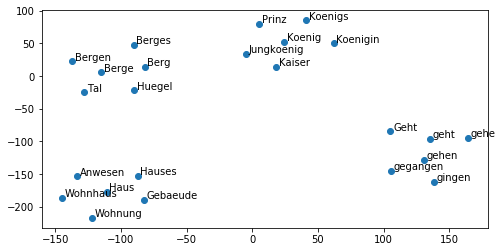

In [12]:
wordlist = ['Haus', 'Berg', 'Koenig', 'gehen']
plot_word_embeddings(pre_w2v, wordlist, figsize=(8,4))

### Eigene Embeddings trainieren

Es ist auch möglich, eigene Embeddings zu trainieren. Dabei muss sich zuvor für die Technik **CBOW** oder **Skip-gram** entschieden werden (wird durch den Parameter `sg`gesteuert). Es wurde der englische Datensatz **Amazon Reviews** verwendet ([Quelle](https://nijianmo.github.io/amazon/index.html)). Dieser wurde für Demonstrationszwecke auf Reviews zu elektronischen Geräten aus dem Jahr 2018 gekürzt. Auch hier passen die ähnlichsten 5 Wörter sehr gut zum ausgewählten Wort *smartphone*.

In [23]:
%%time
word2vec_cbow = Word2Vec(texts, min_count=1, size=100, window=5, sg=0)
word2vec_skipgram = Word2Vec(texts, min_count=1, size=100, window=5, sg=1)

CPU times: user 6min 1s, sys: 4.19 s, total: 6min 5s
Wall time: 2min 53s


In [26]:
word2vec_cbow.wv.most_similar('phone', topn=5)

[('iphone', 0.7408102750778198),
 ('phones', 0.657496452331543),
 ('ph', 0.635297954082489),
 ('car', 0.626123309135437),
 ('cell', 0.6212888956069946)]

## GloVe

**GloVe** (= Global Vectors) wurde 2014 von Pennigton et. al. veröffentlicht. Vor der Veröffentlichung von Globe ließen sich die Wortvektorisierungsmethoden in zwei Hauptströmungen unterteilen: das Statistik-basierende **LDA**[<sup>3</sup>](#fn3) und das lernbasierte **Word2Vec**. Während LDA Wörter mithilfe von Häufigkeiten in einer Kookkurrenz-Matrix darstellt, verwendet Word2Vec zur Darstellung der Wörter Wortwahrscheinlichkeiten, die mithilfe eines Voraussage-Modells erstellt wurden. **GloVe** verwendet wie LDA für die Darstellung der Häufigkeiten eine Kookkurrenz-Matrix, wobei GloVe die Häufigkeiten vorher normalisiert und mithilfe des Logarithmus *"glättet"* (englisch: *smoothing*). Anders als Word2Vec benutzt es für die Erstellung der Embeddings also keine neuronalen Netze, die erst durch ein Training die Wortbeziehungen erlernen, sondern die Beziehungen werden **global** (daher auch der Name) mithilfe einer Mischung aus maschinellem Lernen und statischen Verfahren aus den Texten gewonnen.

<hr style="border: 0.1px solid black;"/>
<div id="fn3" style="font-size:8pt; line-height:1; padding-left: 1em; text-indent: -1em"><sup style="font-size:5pt">3</sup> &nbsp;<b>LDA</b> steht für "Latent Dirichlet allocation" und ist ein Algorithmus, der Wörter ähnlichen Gruppen anhand der Wahrscheinlichkeit, dass sie zusammen in einem Dokument vorkommen, zuordnet.</div>

Für die Demonstatration der Glove-Embeddings wurde die Bibliothek **Flair** verwendet. Jeder Vektor für jedes Token-Embedding hat eine Länge von 100, es wurden jedoch nur die ersten drei Zahlen ausgegeben.

In [56]:
sentence = Sentence('smartphones have a touchscreen', use_tokenizer=True)
WordEmbeddings('glove').embed(sentence)

for token in sentence:
    print(f"'{token.text}': {token.embedding[:3]} " +
          f"(Vektorlänge: {len(token.embedding)})")

'smartphones': tensor([-0.2138, -0.3245,  0.2806]) (Vektorlänge: 100)
'have': tensor([0.1571, 0.6561, 0.0021]) (Vektorlänge: 100)
'a': tensor([-0.2709,  0.0440, -0.0203]) (Vektorlänge: 100)
'touchscreen': tensor([-0.7974,  0.1240,  0.7148]) (Vektorlänge: 100)


## FastText

TODO

## ELMo

TODO

## BERT


BERT steht für "Bidirectional Encoder Representations from Transformers" und brach bei seiner Veröffentlichung 2018 eine ganze Reihe von Rekorden für Aufgaben des Natural Language Processing. 